##                                           MDS aplicado a los estados de la República Mexicana

Se realizó un mds , para visualizar la distancia o configuración relativa de los 32 estados de la República Mexicana.
La muestra usada está formada por un sector de personas que en las encuestas sobre victimización y percepción de la violencia de INEGI 2019, que contestaron, fueron forzadas a alguna actividad sexual no deseada o declararon haber sufrido abuso sexual*.


## Metodología del análisis MDS:

Se contruyó una base de 32 registros (uno para cada edo) con las variables:

#### Número de casos para cada delito* :Tpo_delito_13.0,Tpo_delito_14.0
#### Número de casos para cada aspecto de "cómo" ocurrio el delito:

  a) El mes en que sucedió: BP1_delito_Ene,..,BP1_delito_dic
  
  b) En qué momento del día ocurrió: BP1_4_maÃ.ana_6_12_am, BP1_4_tarde_12_18, BP1_4_noche_18_24, BP1_4_madrugada_01_06
  
  
  c) En dónde ocurrió: BP1_5_calle, BP1_5_casa, BP1_5_trabajo, BP1_5_negocio_establecimiento, BP1_5_lugar_publico
                   BP1_5_trans_pub, BP1_5_carretera
                   
  d) Si la victima estaba acompañada o iba :BP1_8_acompaniada_si, BP1_8_acompaniada_no 
  
  e) El número de delincuentes:BP1_9_1_num_delin_1, BP1_9_1_num_delin_2, BP1_9_1_num_delin_3, BP1_9_1_num_delin_4,                      BP1_9_1_num_delin_5, BP1_9_1_num_delin_6
  
  f) El tipo de ofensa : BP7_1_tpo_ofensa_int_viola, BP7_1_tpo_ofen_hostig, BP7_1_tpo_ofen_tocamiento, BP7_1_tpo_ofen_exhib
  
#### Número de victimas de sexo femenino:sexo_2  

#### Número de victimas de sexo masculino:sexo_1 

#### Número de victimas para tres categorias de edades ; Adulto_joven :18-30 años, Adulto: 31-59 años, Adulto_mayor:+60 años.


* Específicamente se estudiaron dos códigos de delito:
 13 :Alguien en contra de su voluntad lo(a) agredió mediante hostigamiento sexual, manoseo, exhibicionismo o intento de        violación
 14: Fue obligado(a) mediante violencia física o amenaza por alguien conocido o desconocido a tener una actividad sexual       no deseada (violación sexual)

In [1]:
#install.packages("smacof")
library('smacof')

Warning message:
"package 'smacof' was built under R version 3.6.3"Loading required package: plotrix
Warning message:
"package 'plotrix' was built under R version 3.6.3"Loading required package: colorspace
Loading required package: e1071
Warning message:
"package 'e1071' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'smacof'

The following object is masked from 'package:base':

    transform



## Análsis por estado

In [57]:
name_edos = c("AGS","BC","BCS","CAMP","CHIS","CHIH","CDMX",	"COAH",	"COL",	"DGO",	"GTO",	"GRO",	"HGO",	"JAL",	"EDO_MEX",	"MICH",	"MOR",	"NAY",	"NL",	"OAX",	"PUE",	"QRO",	"QRoo",	"SLP",	"SIN",	"SON",	"TAB",	"TAMPS",	"TLAX",	"VER",	"YUC",	"ZAC")

[1] 0.5237309 0.5237309

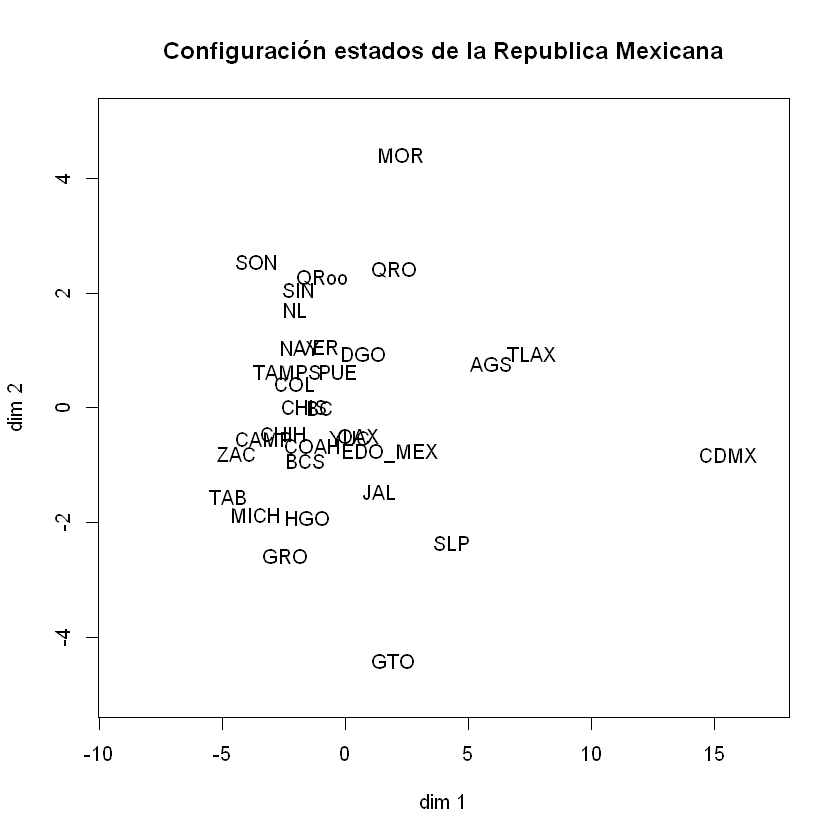

In [58]:
# Cargar la base con información por municipio
edos <- read.csv("C:/Users/Documents/DATA_JAM/MEXICO/data_mds_ff_edo.csv")
# dim(edos) #32 44
base_ = edos[,-1]   # quitamos los nombres de las variables columna
base2_= base_[,-43]
base3_ = scale(base2_, center =TRUE, scale = TRUE) #estandarizamos los datos
dis_edos_ = dist(base3_, method = "euclidean", diag = TRUE, upper = TRUE) #Matriz de distancias

resul_mds_clas_<-cmdscale(dis_edos_, k = 3, eig = TRUE, add = FALSE, x.ret = FALSE) # MSD clasico

# se extrae la configuracion solucion X
config_nations_<-resul_mds_clas_$points

#se añaden los nombres de las naciones a la configuracion solucion X
dimnames(config_nations_)[[1]]<-name_edos

#se grafica la configuracion solucion obtenida mediante mds clasico

plot(config_nations_[,1],config_nations_[,2],main="Configuración estados de la Republica Mexicana",
     xlab="dim 1",ylab="dim 2",type="n",lwd=0.5,ylim =c(-5,5) ,xlim=c(-9,17) )

text(config_nations_[,1],config_nations_[,2],labels=row.names(config_nations_))

# se obtiene la proporcion de la varianza total explicada por las dos dimensiones
resul_mds_clas_$GOF

# Interpretación

El gráfico de arribla muestra la cercanía (qué tan similares) son los estados entre sí, en el sentido de cercanía en
las características de los delitos sexuales.

Calculando la correlación entre los valores de cada estado en cada dimensión y las variables de la tabla original,
se encontró lo siguiente:

### para la dimensión 1 las variables con mayor peso (o representadas al proyectar sobre ese eje) son:

*El tipo de delito 13 (hostigamiento sexual pero sin presentarse la violación), 
*Se llevaron a cabo en los meses de enero,mayo,nov y dic
*Se efectuaron principalmente en la mañana,tarde y noche.
*Situándose en calle y transporte público.
*La victima se encontraba acompañada y
*El número de delincuentes se sitúa en 1 y 2.
*El tipo de ofenza fue el hostigamiento y tocamientos, para  mujeres en edad de adulto joven.

Podemos observar 4 agrupaciones en especifico para  los estados en la dirección de Dimension 1.

1.-Morelos, Querétaro,estado de México,Jalisco San Luis Potosi,Guanajuato (geograficamente cercanos)
2.-Quintana Ro ,Durango, Sinaloa,Nuevo León,Nayarit, Veracruz,Tamaulipas, Puebla,Colima,Chihuahua,Baja Califoria,Chiapa,Coahuila,
    Campeche,Michoacan,Guerrero,Zacatecas.
3.-Tlaxcala,Aguascalientes
4. Ciudad de México



#### Por otro lado, para el eje de dimensión 2, las variables que tienen representación son el delito tipo 14 efectuado en casa.

Para Dimensión 2 distinguimos (proyectando sobre el eje) 6 agrupaciones importantes.

1. Morelos
2.-Sonora, Quintana Roo, Queretaro,Sinaloa,Nuevo León.
3.-Nayarit,Veracruz,Durango,Tamaulipas,Colima,Tlaxcala,Aguascalientes,Chiapas,Baja California.
4.-Zacatecas,Baja Califronia Sur,Coahuila,CDMX,EDO_MEX,Oaxaca.
5.-Tabascco,Michoacan,Hidalgo,Jalisco,San Luis Potosi,Guerrero.
6.-Guanajuato.



Lista de abreviaturas de los Estados de México

    Estado         Variable
Aguascalientes       Ags.
Baja California      B.C.
Baja California Sur  BCS
Campeche             Camp.
Chiapas              Chis
Chihuahua            Chih.
Ciudad de México     CDMx
Coahuila             Coah
Colima               Col
Durango              Dgo
Guanajuato           Gto
Guerrero             Gro
Hidalgo              Hgo
Jalisco              Jal
México               Edo. Méx
Michoacán            Mich
Morelos              Mor
Nayarit              Nay
Nuevo León           N.L
Oaxaca               Oax.
Puebla               Pue
Querétaro            Qro.
Quintana Roo         Q.Roo
San Luis Potosí      SLP
Sinaloa              Sin
Sonora               Son
Tabasco              Tab
Tamaulipas           Tamps
Tlaxcala             Tlax.
Veracruz             Ver.
Yucatán              Yuc
Zacatecas            Zac.

## Correlación entre las puntuaciones de las dimensiones y las variables.

In [73]:
puntos = resul_mds_clas_$points
dim1 = puntos[,1]
dim2 = puntos[,2]
dim3 = puntos[,3]
tab_pca = edos[,-1]
tab_pca = tab_pca[,-43]
tab_pca_1 = cbind(dim1,tab_pca)
tab_pca_2 = cbind(dim2,tab_pca)
cor_dim1 = cor(tab_pca_1)[1,]
cor_dim2 = cor(tab_pca_2)[1,]